# MOVIE RECOMMENDATION SYSTEM BASED ON CONTENT  BASED FILTERING

# Importing required packages

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DATA in Movie Dataset 

The data is in csv format. A comma-separated values file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. Data are collected on 12 different informations of a movie,with rating being in the order of 1 (worst) and 10 (best) and the metascore being in the order from 1 (worst) and 100 (best).

In [64]:
df = pd.read_csv('movie.csv')

In [65]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Attributes for the given Movie Dataset are :

1. Rank
2. Title
3. Genre
4. Description
5. Director
6. Actors
7. Year
8. Runtime (Minutes)
9. Rating
10.Votes
11.Revenue
12.Metascore

Size of Dataset

In [5]:
df.size

12000

Shape of Dataset

In [6]:
df.shape


(1000, 12)

DataFrame.describe(percentiles=None, include=None, exclude=None)
Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types.

In [7]:
df.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","After a near-fatal plane crash in WWII, Olympi...",Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


# 1. DATA PREPROCESSING AND CLEANSING

We check for missing values in the dataset

In [8]:
df.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

We notice that the attributes Revenue and Metascore contain missing/null values.
We fill these null values with the mean values of the corresponding attribute columns.

In [67]:
df.mean()

Rank                     500.500000
Year                    2012.783000
Runtime (Minutes)        113.172000
Rating                     6.723200
Votes                 169808.255000
Revenue (Millions)        82.956376
Metascore                 58.985043
dtype: float64

fillna() can “fill in” NA values with non-NA data in a couple of ways.
We use mean values to fill null values.

In [68]:
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean())

In [70]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())

In [71]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

We remove irrelevant columns and attributes.
We do not take into account the attributes 'Description', 'Actors', and 'Director' for the Recommendation System.

In [72]:
dfn = df.drop(columns = ['Description', 'Actors', 'Director'])

In [73]:
dfn.head()

,Rank,Title,Genre,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",2016,123,6.2,393727,325.02,40.0


# 2. Exploratory Data Analysis : Data Exploration using Seaborn package


   Grid type           Grid function             Axes function                  Variable type
   
1. FacetGrid           factorplot                stripplot, swarmplot,          Categorical
                                                 boxplot, violinplot,
                                                 lvplot, pointplot, 
                                                 barplot, countplot
                                                 
2. FacetGrid           lmplot                    regplot                        Continuous

3. PairGrid            pairplot                  regplot, distplot, kdeplot     Continuous

4. JointGrid           jointplot                 regplot, kdeplot, residplot    Continuous

5. ClusterGrid         clustermap                heatmap                        Continuous


# a. Univariate Data:


Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).
-seaborn.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
Remove the top and right spines from plot(s).

# Rating 

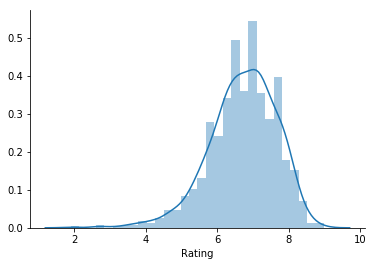

In [74]:
x = dfn['Rating']
sns.distplot(x)
sns.despine()



seaborn.boxplot():
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
Parameters:
x = feature of dataset
y = feature of dataset
hue = feature of dataset
data = datafram or full dataset
color = color name

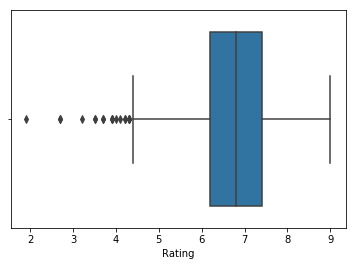

In [20]:
sns.boxplot(dfn['Rating'])


Observations and inferences for 'Rating':
    1. Ratings are between 6-8 out of 10.
    2. Box-plot is left skewed.
    3. Very few outliers present

# Runtime (Minutes)


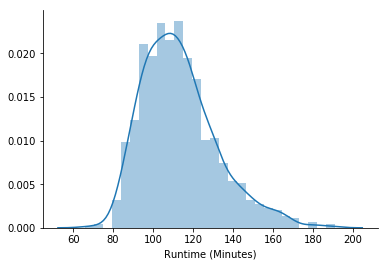

In [21]:
x = dfn['Runtime (Minutes)']
sns.distplot(x)
sns.despine()

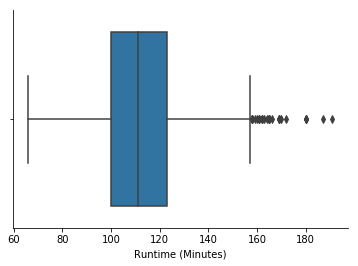

In [75]:
sns.boxplot(dfn['Runtime (Minutes)'])
sns.despine()

Observations and inferences for 'Runtime':
    1. Runtime for most movies is between 100 - 120 minutes
    2. Less number of outliers present


# Metascore

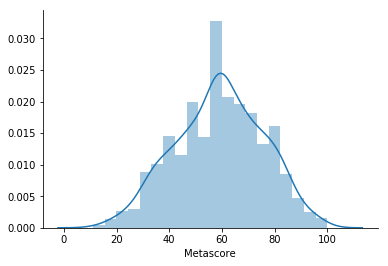

In [76]:
x = dfn['Metascore']
sns.distplot(x)
sns.despine()

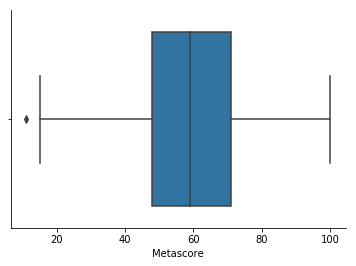

In [17]:
sns.boxplot(dfn['Metascore'])
sns.despine()

Obeservations and inferences for 'Metascore':
    1. Normal distribution observed for boxplot
    2. Outliers are almost negligile
    3. Average metascore observed is 60.

# b. Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

Obeserving Co-Relation between attributes using HeatMap:  

seaborn.heatmap
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
Plot rectangular data as a color-encoded matrix.
This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

annot:if True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.

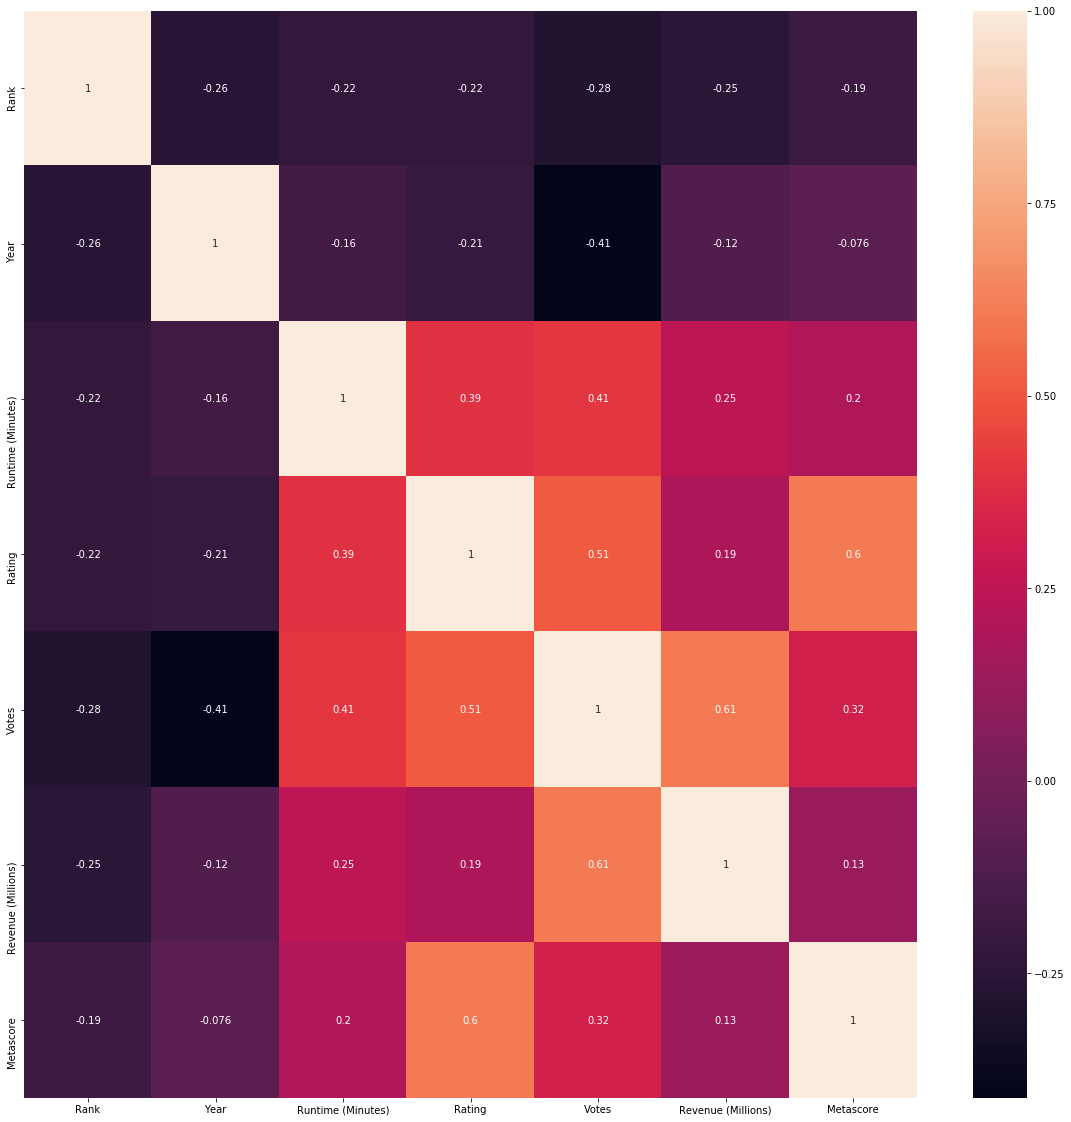

In [18]:

plt.figure(figsize =(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Year VS Rating

seaborn.regplot
seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
Plot data and a linear regression model fit.

-{x,y}_jitter : floats, optional
Add uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.
-{scatter,line}_kws : dictionaries
Additional keyword arguments to pass to plt.scatter and plt.plot.


In [ ]:
Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis. It is used when you need to know the distribution of the variable.

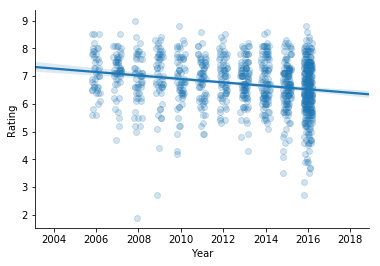

In [19]:
sns.regplot(x = 'Year', y = 'Rating', data = dfn, x_jitter = 0.2, scatter_kws={'alpha':0.2})
sns.despine()

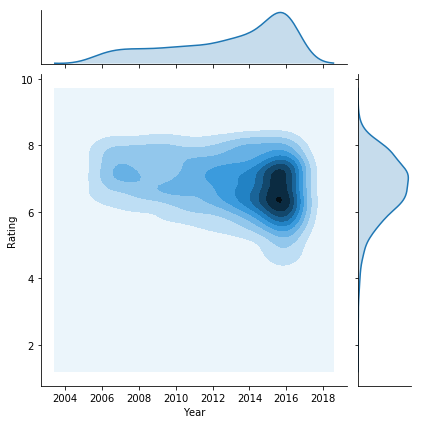

In [20]:
sns.jointplot(x='Year', y='Rating', data=dfn, kind="kde")
sns.despine()

Observations and Inferences :
    1. Decreasing trend observed in Ratings.
    2. Maximum data observed in the year 2016.

# Year VS Metascore

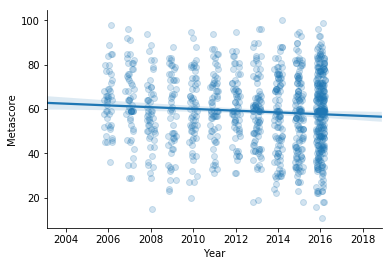

In [21]:
sns.regplot(x = 'Year',y = 'Metascore',data = dfn , x_jitter=0.2, scatter_kws={'alpha':0.2})
sns.despine()

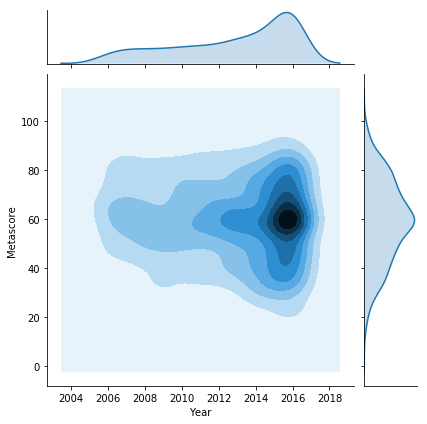

In [22]:
sns.jointplot(x='Year', y='Metascore', data=dfn, kind="kde")
sns.despine()

# Year VS Runtime (Minutes)

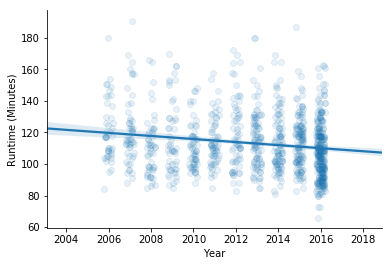

In [27]:
sns.regplot(x = 'Year',y = 'Runtime (Minutes)',data = dfn , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

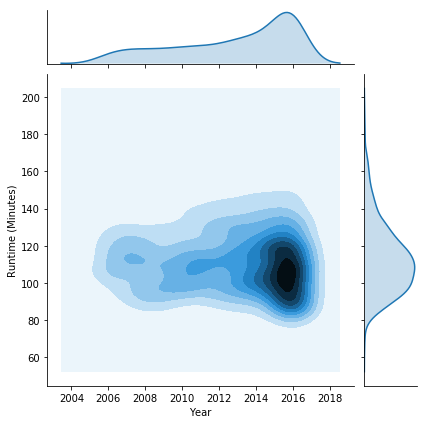

In [29]:
sns.jointplot(x="Year", y='Runtime (Minutes)', data=dfn, kind="kde")
sns.despine()

Observations and Inferences:
    1. The average runtime has been 120 minutes over the years.
    2. A very slight decreasing trend.

# c. Multivariate Analysis

Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

# Runtime VS Rating in terms of Year

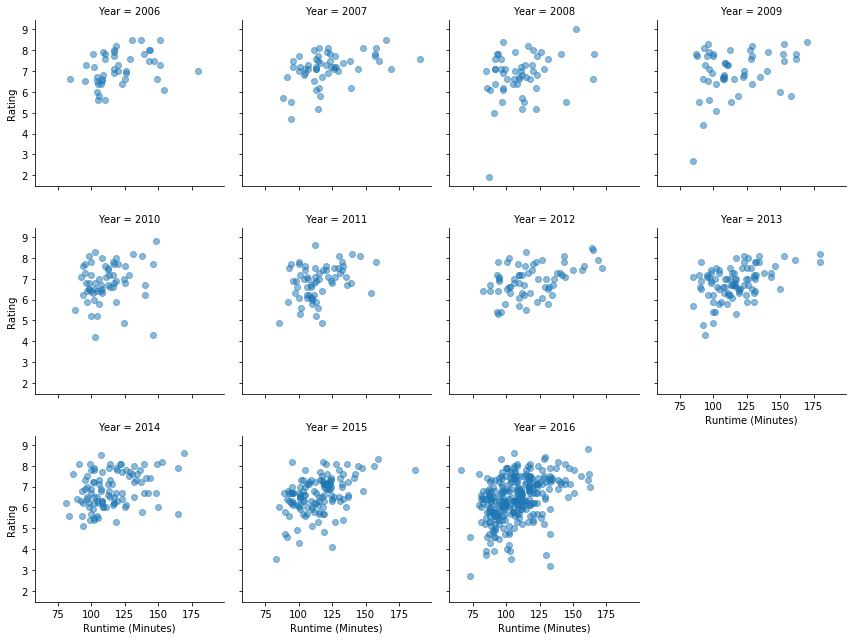

In [30]:
grid = sns.FacetGrid(dfn, col = 'Year', col_wrap = 4)
grid.map(plt.scatter,'Runtime (Minutes)','Rating',alpha = 0.5)
sns.despine()

Inferences:
We observe that the dataset contains maximum number of movies from 2016 and over the years the average runtime of movies has been around 100-125 minutes

# 3. WORD CLOUD

Generating Word Cloud in Python :
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [77]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS  

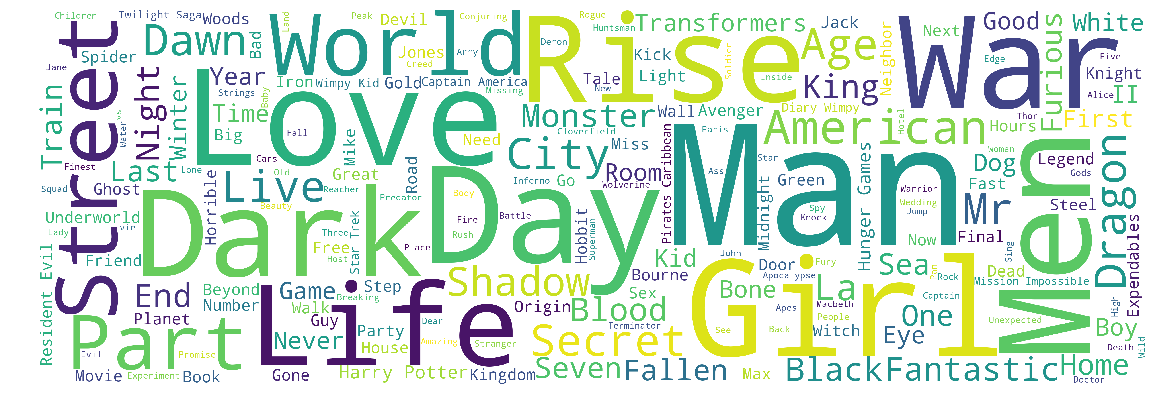

In [78]:
# Create a wordcloud of the movie titles
dfn['Title'] = dfn['Title'].fillna("").astype('str')
ttle_corpus = ' '.join(dfn['Title'])
ttle_wordcloud = WordCloud(stopwords = STOPWORDS, background_color= 'white', height = 1700, width = 5000).generate(ttle_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(ttle_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()


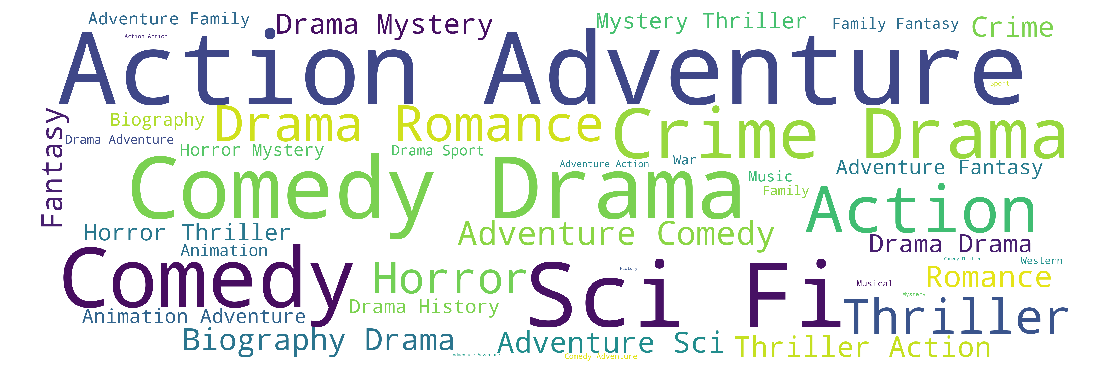

In [79]:
#Generating WordCloud for Genre

dfn['Genre'] = dfn['Genre'].fillna("").astype('str')
ttle_corpus = ' '.join(dfn['Genre'])
ttle_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1700, width = 5000).generate(ttle_corpus)

#Plotting wordcloud
plt.figure(figsize = (15,8))
plt.imshow(ttle_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# 4. CONTENT BASED RECOMMENDATION SYSTEM :
    

Types of Recommendation Systems:
Collaborative Filtering: 
This method makes automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on a set of items, A is more likely to have B's opinion for a given item than that of a randomly chosen person.

Content-Based Filtering: This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.

Source:
https://medium.com/deep-math-machine-learning-ai/chapter-9-1-nlp-word-vectors-d51bff9628c1
https://medium.com/deep-math-machine-learning-ai/chapter-9-2-nlp-code-for-word2vec-neural-network-tensorflow-544db99f5334

Content-Based Filtering Using TF-IDF(Term frequency-Inverse term frequency):
tf-idf is a weighting factor which is used to get the important features from the documents(corpus).
It actually tells us how important a word is to a document in a corpus, the importance of a word increases proportionally to the number of times the word appears in the individual document, this is called Term Frequency(TF).

1. TF = (no of times the word appear in the doc) / (total no of words in the doc)

2. The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents.
IDF — Log(total no of documents / no of documents with the term t in it).
so TF-IDF = TF * IDF. So finally by using TF-IDF we get the most important features from the documents(corpus) with weights.

3. Word 2 vec takes care of two things
   a. Converts high dimensional vector (10000 sized) into low dimensional vector (let’s say 200 sized).
   The conversion of 10,000 columned matrix into a 200 columned matrix is called word embedding. 
   b. Maintains the word context (meaning)
   
    --> the word context / meaning can be created using 2 simple algorithms which are:
    A. Continuous Bag-of-Words model (CBOW) : It predicts one word based on the surrounding words (it takes an entire context          as an observation or takes a window sized context as an observation)
    Ex: Text= “Mady goes crazy about machine leaning” and window size is 3.
    It takes 3 words at a time predicts the center word based on the surrounding words → [ [“Mady”,”crazy” ] , “goes”] → “goes”
    is the target word , and the other two are inputs.
    
    B. Skip-Gram model :
    It takes one word as input and try to predict the surrounding (neighboring) words,
    [“Mady”, “goes”],[“goes”,”crazy”] → “goes” is the input word and “Mady” and “Crazy” are the surrounding words
    (Output probabilities)
    
    Simply word 2 vec
    → it’s a neural network training for all the words in our dictionary to get the weights(vectors )
    → it has word embeddings for every word in the dictionary







source : https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223

In [80]:
#TfidVectorizer : Converts a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# from sklearn.feature_extraction.text import TfidVectorizer
import sklearn
print(sklearn.__version__)

0.20.2


In [82]:
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(dfn['Genre'])

#toarray returns an ndarray; todense returns a matrix. If you want a matrix, use todense; otherwise, use toarray.
print(tfidf_matrix.todense().shape)


(1000, 21)


In [84]:
df2 = pd.DataFrame(tfidf_matrix.todense())
df2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.402181,0.430870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.571227,0.000000,0.000000,0.0,0.0
1,0.000000,0.394839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.523459,...,0.000000,0.000000,0.000000,0.544136,0.000000,0.523459,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.764645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.644452,0.0,0.0
3,0.000000,0.000000,0.658782,0.000000,0.374818,0.000000,0.000000,0.652317,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.477136,0.511172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714874,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.477136,0.511172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714874,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.391659,0.000000,0.287037,0.000000,0.000000,0.000000,...,0.000000,0.874193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,0.461223,0.494125,0.000000,0.736963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,0.000000,0.569315,0.000000,0.000000,0.000000,0.000000,0.404068,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.715968,0.000000,0.000000,0.000000,0.0,0.0


In [86]:
Compute cosine similarity between samples in X and Y.

Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:

K(X, Y) = <X, Y> / (||X||*||Y||)


In [87]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cos_sim)


[[1.         0.76815261 0.         ... 0.         0.30951647 0.        ]
 [0.76815261 1.         0.         ... 0.         0.28363342 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.30951647 0.28363342 0.         ... 0.         1.         0.28134523]
 [0.         0.         0.         ... 0.         0.28134523 1.        ]]


# 1-D Array for Movie Title:

In [103]:
titles = dfn['Title']

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.
Labels need not be unique but must be a hashable type. The object supports both integer and label-based indexing and provides a host of methods for performing operations involving the index.

data : array-like, Iterable, dict, or scalar value
Contains data stored in Series.


index : array-like or Index (1d)
Values must be hashable and have the same length as data. Non-unique index values are allowed. Will default to RangeIndex (0, 1, 2, …, n) if not provided. If both a dict and index sequence are used, the index will override the keys found in the dict.

-pandas.DataFrame.index : DataFrame.index
The index (row labels) of the DataFrame.

In [104]:
indice = pd.Series(df.index, index=dfn['Title'])
print(indice.head(5))

Title
Guardians of the Galaxy    0
Prometheus                 1
Split                      2
Sing                       3
Suicide Squad              4
dtype: int64


# Recommend Movies Based on Cosine Similarity Score of Movie Genres:

In [110]:
def genre_recommendations(title):
    similarity_scores = list(enumerate(cos_sim[indice[title]]))
    
    # Sorting the recommendation list according to cosine similarity
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Printing the top 30 recommendations in desencding order of similarity score
    similarity_scores = similarity_scores[1:30]
    
    # Indexing with Integer Location and returning the values
    movie_indice = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indice]



# Recommending movies based on cosine similarity of genres

In [112]:
genre_recommendations('Mad Max: Fury Road')


12                               Rogue One
24            Independence Day: Resurgence
32                       X-Men: Apocalypse
35              Captain America: Civil War
48                        Star Trek Beyond
60      Batman v Superman: Dawn of Justice
67                      Mad Max: Fury Road
80                               Inception
85                          Jurassic World
94                 Avengers: Age of Ultron
126        Transformers: Age of Extinction
140                              Star Trek
156                            Pacific Rim
162             X-Men: Days of Future Past
195     Captain America: The First Avenger
200                       Edge of Tomorrow
203                               Iron Man
205                         X: First Class
212                           Transformers
216    Captain America: The Winter Soldier
220                         Hardcore Henry
227                              Predators
243                     Terminator Genisys
253        